In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
nbaRookieFrame = pd.read_csv('s3://rmit-ml-2020s1-lab-data/nba/nbaRookies.csv', delimiter = ',').drop('Name', axis = 1)

nbaRookieFrame.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0


<Figure size 1152x576 with 0 Axes>

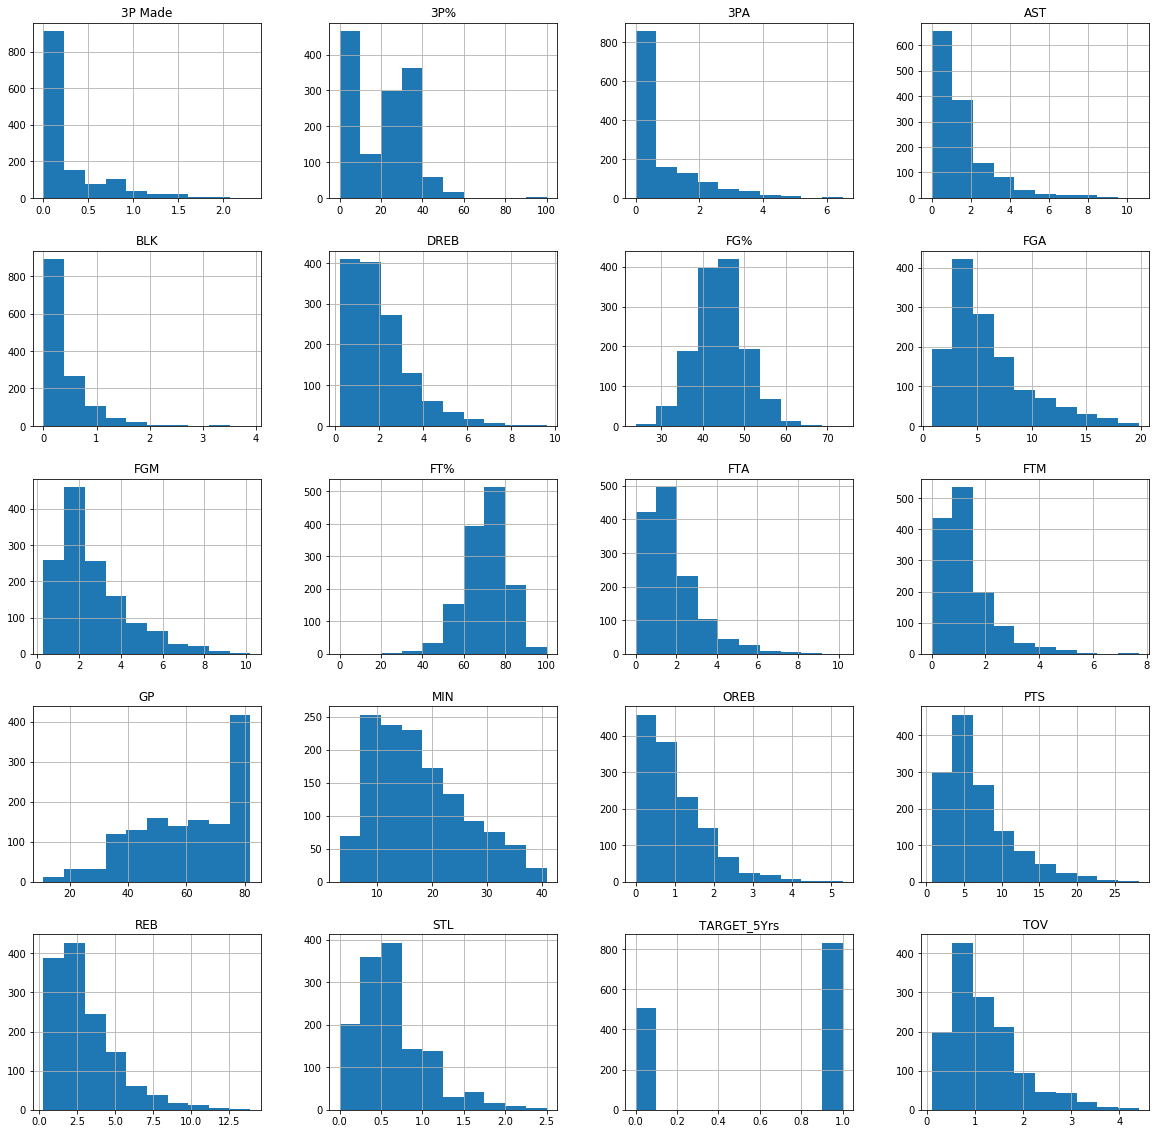

In [23]:
plt.figure()
nbaRookieFrame.hist(figsize = (20, 20))
plt.show()

In [24]:
pd.isna(nbaRookieFrame).sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [25]:
nbaRookieFrame[pd.isna(nbaRookieFrame).any(axis = 1)]

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
338,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
339,64,12.7,4.1,1.8,3.3,52.8,0.0,0.0,NaN,0.6,1.3,43.5,1.4,2.4,3.8,0.3,0.2,0.3,0.9,0.0
340,53,10.8,2.8,1.3,2.1,60.4,0.0,0.0,NaN,0.3,0.8,42.5,0.9,1.9,2.8,0.3,0.4,0.4,0.4,0.0
358,79,24.7,10.6,4.6,9.0,51.1,0.0,0.0,NaN,1.4,1.8,78.4,2.0,3.8,5.7,0.5,0.5,1.1,1.5,1.0
386,60,11.9,3.2,1.2,2.4,48.6,0.0,0.0,NaN,0.8,1.1,75.8,0.7,1.7,2.5,0.5,0.2,0.5,1.2,1.0
397,39,6.9,1.3,0.5,1.3,41.2,0.0,0.0,NaN,0.3,0.5,50.0,0.5,1.5,1.9,0.3,0.2,0.3,0.4,0.0
507,59,18.2,6.1,2.6,4.7,55.6,0.0,0.0,NaN,0.8,1.5,55.1,1.5,3.7,5.2,0.6,0.8,1.3,1.1,0.0
509,63,17.2,5.3,2.2,4.7,46.1,0.0,0.0,NaN,1.0,1.7,58.3,1.5,3.2,4.7,1.0,0.3,1.3,0.9,1.0
510,71,17.0,4.9,2.1,4.2,50.3,0.0,0.0,NaN,0.7,1.0,70.8,1.5,2.1,3.6,0.7,0.6,0.3,0.8,1.0
521,72,11.9,2.9,1.2,2.3,50.9,0.0,0.0,NaN,0.5,1.2,45.9,1.0,1.5,2.5,0.6,0.3,0.7,0.7,0.0


In [26]:
nbaRookieFrame = nbaRookieFrame.fillna(0)

In [27]:
X = nbaRookieFrame.drop('TARGET_5Yrs', axis=1)
Y = nbaRookieFrame.TARGET_5Yrs

In [28]:
from sklearn.model_selection import train_test_split
nbaTrainX, nbaTestX, nbaTrainY, nbaTestY = train_test_split(X, Y, test_size = 0.2)

In [29]:
nbaTrainX, nbaValX, nbaTrainY, nbaValY = train_test_split(nbaTrainX, nbaTrainY, test_size = 0.2)

In [30]:
from sklearn.linear_model import LogisticRegression
logRegNba = LogisticRegression(C = 10000, max_iter = 100, solver = 'liblinear')

In [31]:
from sklearn import model_selection
number_splits = 10
kFold = model_selection.KFold(n_splits = number_splits, shuffle = True)

In [32]:
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=4, include_bias=True)
polyTrainX = polyFeat.fit_transform(nbaTrainX)
polyValX = polyFeat.fit_transform(nbaValX)
polyTestX = polyFeat.fit_transform(nbaTestX)
logRegNba.fit(polyTrainX, nbaTrainY)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=10000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
lRegPara = np.linspace(0.001, .5, num = 20)

Text(0, 0.5, 'Average MSE')

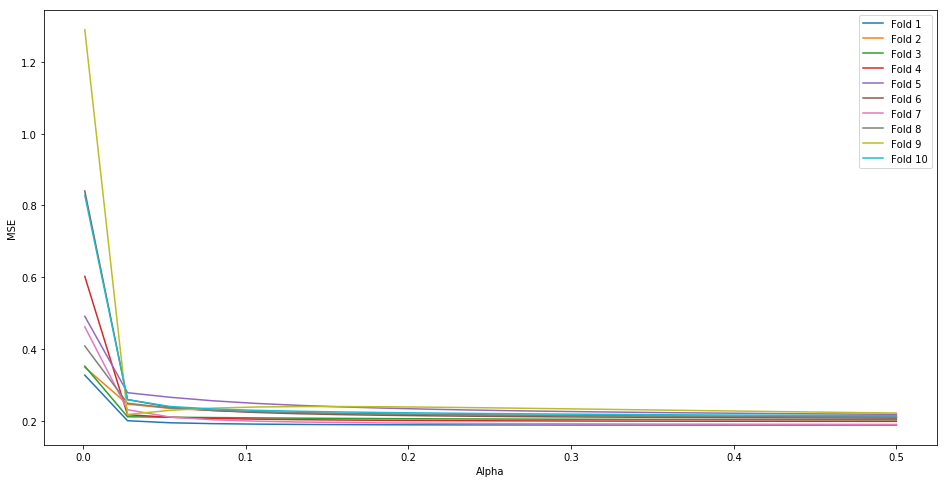

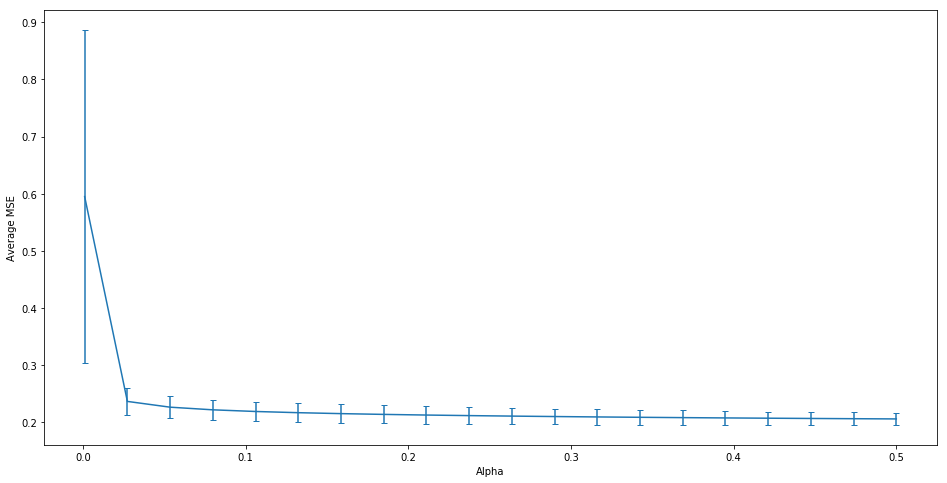

In [35]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
plt.figure()
lResults = np.zeros((number_splits, len(lRegPara)))
nsplit = 0
for trainIndex, validIndex in kFold.split(X):
    trainX = np.array(X.loc[trainIndex])
    trainY = np.array(Y.loc[trainIndex])
    validX = np.array(X.loc[validIndex])
    validY = np.array(Y.loc[validIndex])
    
    polyFitTrainX = polyFeat.fit_transform(trainX)
    polyFitValidX = polyFeat.fit_transform(validX)
    
    for j , regPara in enumerate(lRegPara):
        polyRidgeReg = linear_model.Ridge(alpha=regPara, normalize=True)
        polyRidgeReg.fit(polyFitTrainX, trainY)
        predY = polyRidgeReg.predict(polyFitValidX)
        mse = mean_squared_error(validY, predY)
        lResults[nsplit, j] = (mse)
    
    plt.plot(lRegPara, lResults[nsplit, :], label='Fold '+str(nsplit+1))
    nsplit = nsplit + 1
    
plt.xlabel("Alpha")
plt.ylabel("MSE")
plt.legend()

plt.figure()
plt.errorbar(lRegPara, np.mean(lResults,axis=0), yerr=np.std(lResults,axis=0),capsize=3)
plt.xlabel("Alpha")
plt.ylabel("Average MSE")

MSE :  0.24658888393851638


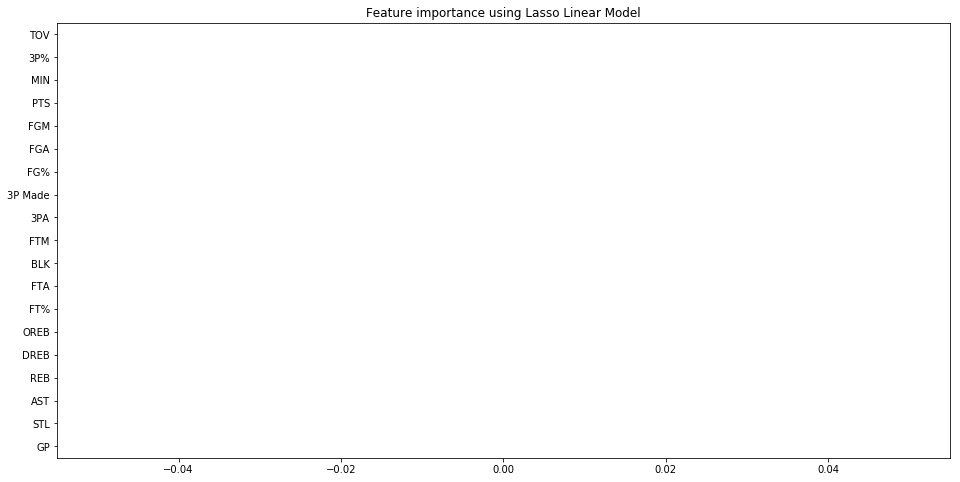

In [36]:
from sklearn.metrics import mean_squared_error
trainX, validX, trainY, validY = model_selection.train_test_split(X, Y, test_size=0.20)
LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainX, trainY)
predY = LassoReg.predict(validX)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)
coef = pd.Series(np.squeeze(LassoReg.coef_), index = X.columns)
imp_coef = coef.sort_values()
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Linear Model")
plt.show()

In [38]:
trainXn = trainX.copy()
validXn = validX.copy()
# make sure you dont have negative vlaues
trainXn['GP'] = np.log10(trainXn['GP'])
validXn['GP'] = np.log10(validXn['GP'])
LassoReg = linear_model.Lasso(alpha=0.05, normalize=True)
LassoReg.fit(trainXn, trainY)
predY = LassoReg.predict(validXn)
mse = mean_squared_error(validY, predY)
print("MSE : ", mse)

MSE :  0.24658888393851638
